#Отбор признаков на примере датасета об сердечно-сосудистых заболеваниях

Датасет: https://www.kaggle.com/rishidamarla/heart-disease-prediction




#Введение
Данные могут содержать большой объем признаков. И не всегда весь объем необходим для выполнения задачи. Критерий отбора признаков включает релевантность для целей анализа данных, качество и технические ограничения, такие как объем данных или тип данных.

Удаление избыточных признаков позволяет лучше понять данные, а также сократить время настройки модели, улучшить её точность и облегчить интерпретируемость.

Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все. Если использовать, то модель окажется переобучена ([overfit](https://www.ibm.com/cloud/learn/overfitting)) и предвзята относительно одного отдельного признака.



#Методы фильтрации

Установка библиотек

In [1]:
pip install numpy pandas matplotlib sklearn

Импорт библиотек и данных

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE, f_classif
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("https://raw.githubusercontent.com/kinomant/ppa-for-da/master/students/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80/Heart_Disease_Prediction.csv")

print('Размер Dataframe:', df.shape)
print(df.head(5))

Размер Dataframe: (270, 14)
   Age  Sex  Chest pain type  ...  Number of vessels fluro  Thallium  Heart Disease
0   70    1                4  ...                        3         3       Presence
1   67    0                3  ...                        0         7        Absence
2   57    1                2  ...                        0         7       Presence
3   64    1                4  ...                        1         7        Absence
4   74    0                2  ...                        1         3        Absence

[5 rows x 14 columns]


In [8]:
print('\n\nИнформация о Dataframe df.info():')
print(df.info())



Информация о Dataframe df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    obj

In [9]:
label = df["Heart Disease"]
df.drop("Heart Disease", axis=1, inplace=True)
print('\n\nЗначение метки "Сердечное заболевание":')
print(label.value_counts())



Значение метки "Сердечное заболевание":
Absence     150
Presence    120
Name: Heart Disease, dtype: int64


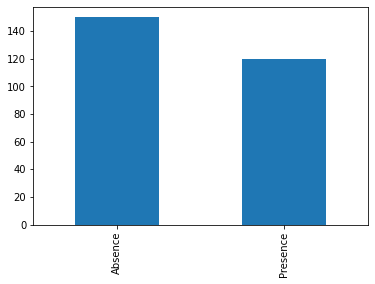

In [11]:
label.value_counts().plot(kind="bar")

Изменение типов данных для признаков, имеющих категориальный характер. Однако, при печати столбцов ("Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium") мы наблюдаем, что они определяются, как данные целого типа и рассматриваются как целые числа

In [12]:
categorical_features = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]
df[categorical_features] = df[categorical_features].astype("category")

Теперь будем масштабировать наши непрерывные функции с помощью MinMaxScaler. Это тип нормализации, когда значения приводятся к интервалу $(0,1)$ по формуле $X_{scaled}=\frac{X - X_{min}}{X_{max} - X_{min}}$

In [13]:
continuous_features = set(df.columns) - set(categorical_features)
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(df[list(continuous_features)])

##Отбор признаков с использованием рекурсивного исключения признаков (RFE)
[RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) (recursive feature elimination) является широко используемой техникой/алгоритмом для выбора точного числа значимых признаков. Иногда метод используется, чтобы объяснить некоторое число «самых важных» признаков, влияющих на результаты; а иногда для уменьшения очень большого числа переменных (около 200-400), и оставляются только те, которые вносят хоть какой-то вклад в модель, а все остальные исключаются. RFE использует ранговую систему. Признакам в наборе данных выставляются ранги. Затем эти ранги используются для рекурсивного исключения признаков в зависимости от коллинеарности между ними и значимости этих признаков в модели.

In [15]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe_norm = df_norm
X_new = rfe.fit_transform(rfe_norm, label)
X_new

array([[4.        , 0.44748858, 0.29007634, 0.38709677, 3.        ],
       [3.        , 1.        , 0.67938931, 0.25806452, 7.        ],
       [2.        , 0.30821918, 0.53435115, 0.0483871 , 7.        ],
       ...,
       [2.        , 0.38356164, 0.6259542 , 0.20967742, 3.        ],
       [4.        , 0.15068493, 0.58778626, 0.06451613, 6.        ],
       [4.        , 0.3652968 , 0.28244275, 0.24193548, 3.        ]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

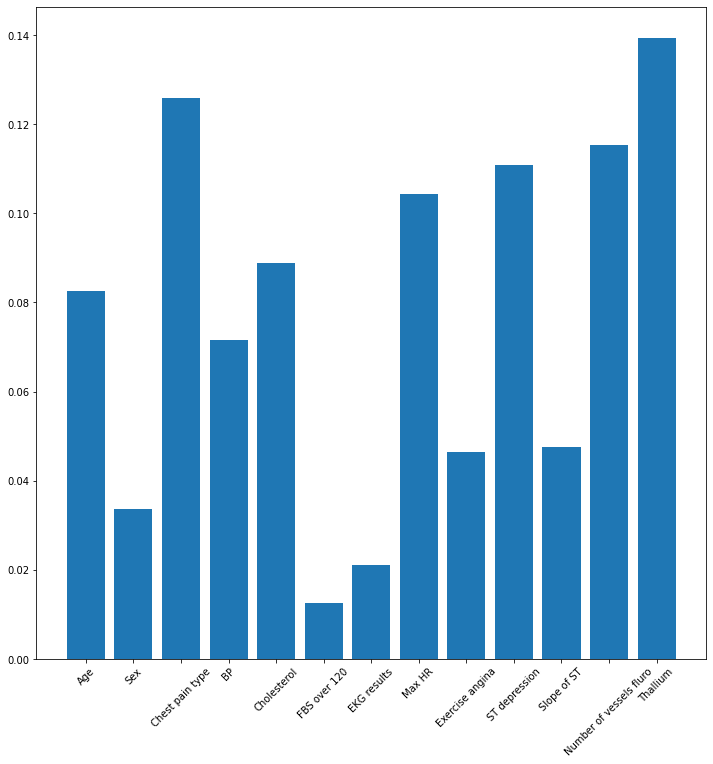

In [25]:
clf = RandomForestClassifier()
clf.fit(rfe_norm, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(rfe_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)

Гистограмма показывает важность каждого признака (атрибута, измерения, набора данных). В нашем случае Thallium и Number of vessels fluro являются наиболее важными характеристиками, но большинство из них имеют важное значение, и в этом случае в значительной степени стоит передать эти признаки нашей модели машинного обучения.

#Отбор по методу X^2
Отбор признков с помощью хи-квадрат для каждого неотрицательного объекта и класса. Эта оценка может использоваться для выбора функций n_features с наивысшими значениями для тестовой статистики хи-квадрат из X, которая должна содержать только неотрицательные функции, такие как логические значения или частоты (например, количество терминов в классификации документа), относительно классов. Использование этой функции «отсеивает» признаки, которые с наибольшей вероятностью будут независимыми от класса и, следовательно, не имеют отношения к классификации.

In [26]:
x2_norm = df_norm
X_new = SelectKBest(k=5, score_func=chi2).fit_transform(x2_norm, label)
X_new

array([[4.        , 0.        , 0.38709677, 3.        , 3.        ],
       [3.        , 0.        , 0.25806452, 0.        , 7.        ],
       [2.        , 0.        , 0.0483871 , 0.        , 7.        ],
       ...,
       [2.        , 0.        , 0.20967742, 0.        , 3.        ],
       [4.        , 0.        , 0.06451613, 0.        , 6.        ],
       [4.        , 1.        , 0.24193548, 3.        , 3.        ]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

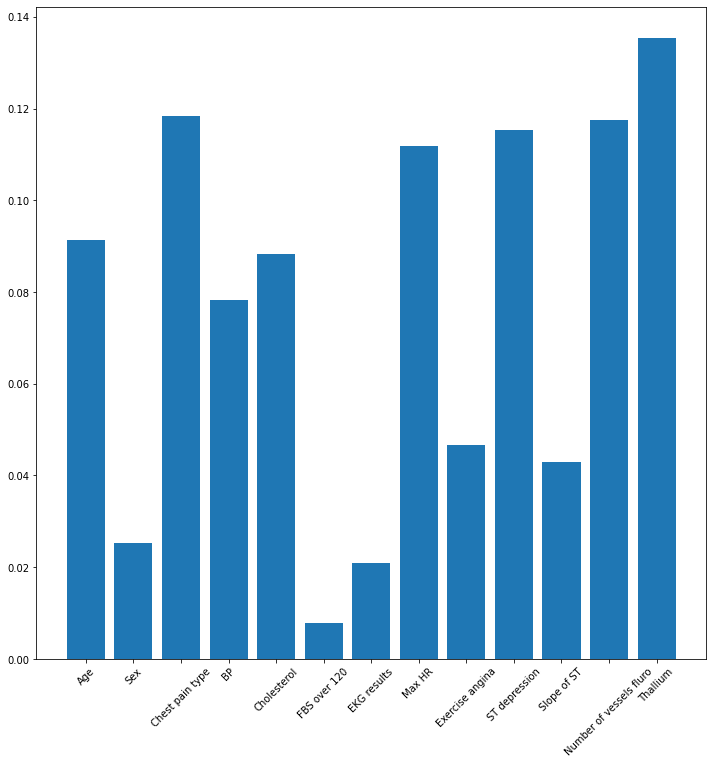

In [27]:
clf = RandomForestClassifier()
clf.fit(x2_norm, label)
# Вывод
plt.figure(figsize=(12,12))
plt.bar(x2_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)

В этом случае Chest pain type и Thllium являются наиболее важными характеристиками.

#ANOVA
Дисперсионный анализ ([ANOVA](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)) может определить, различаются ли средние значения трех или более групп. ANOVA использует F-тесты для статистической проверки равенства средних.

In [28]:
anova_norm = df_norm
X_new = SelectKBest(k=5, score_func=f_classif).fit_transform(anova_norm, label)
X_new

array([[0.29007634, 0.        , 0.38709677, 3.        , 3.        ],
       [0.67938931, 0.        , 0.25806452, 0.        , 7.        ],
       [0.53435115, 0.        , 0.0483871 , 0.        , 7.        ],
       ...,
       [0.6259542 , 0.        , 0.20967742, 0.        , 3.        ],
       [0.58778626, 0.        , 0.06451613, 0.        , 6.        ],
       [0.28244275, 1.        , 0.24193548, 3.        , 3.        ]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

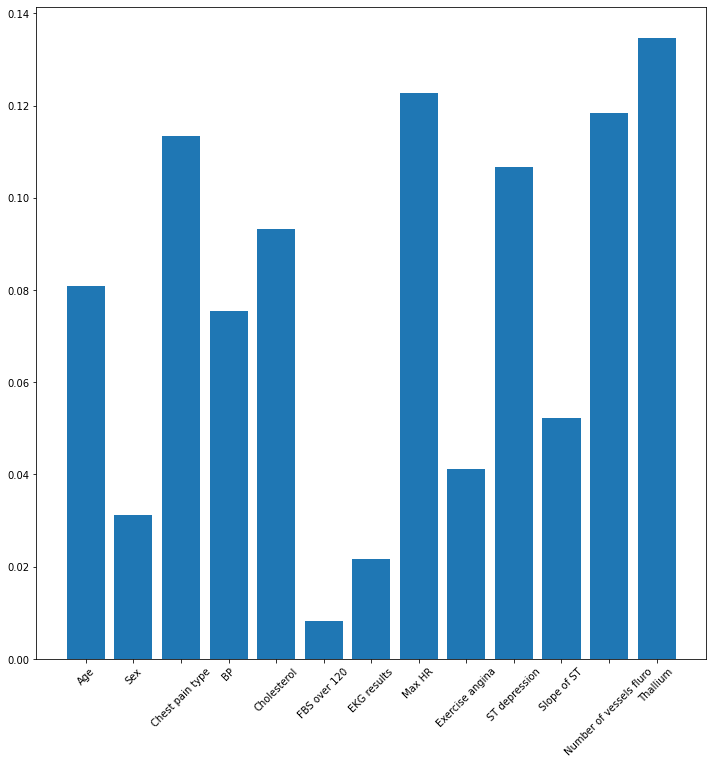

In [29]:
clf = RandomForestClassifier()
clf.fit(anova_norm, label)
# Вывод
plt.figure(figsize=(12,12))
plt.bar(anova_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)

В этом случае Chest pain type и Thllium являются наиболее важными характеристиками.

#Источники:

https://habr.com/ru/post/550978/

https://tproger.ru/translations/feature-engineering-in-machine-learning/

http://www.machinelearning.ru/wiki/index.php?title=CRISP-DM/Data_Preparation

https://waksoft.susu.ru/2021/02/09/otbor-priznakov-s-pomoshhyu-scikit-learn-v-python/

https://en.wikipedia.org/wiki/Chi-squared_distribution

https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

https://en.wikipedia.org/wiki/Analysis_of_variance

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

https://www.ibm.com/cloud/learn/overfitting

# Ревью

## Передреев Дмитрий

Туториал прошел. Блок с импортом данных из csv не запускался, если не скачать сам файл датасета с Kaggle - добавил ссылку на файл из этого репо. Как только смержится коммит, ссылка должна заработать.